In [1]:
import sys
sys.path.append(r"/Users/mocquin/MYLIB10/MODULES/quantities-comparison/")

In [2]:
%matplotlib inline

In [3]:
from benchmarks.base import BenchNumpy
from IPython.core.display import HTML


# Bench Numpy

In [4]:
bn = BenchNumpy()

In [5]:
print(bn.unary_ops)
print(bn.binary_ops)
print(bn.unary_ufuncs)
print(bn.binary_ufuncs)

[<built-in function abs>, <built-in function neg>, <built-in function pos>]
[<built-in function add>, <built-in function sub>, <built-in function mul>, <built-in function floordiv>, <built-in function floordiv>, <built-in function truediv>, <built-in function mod>, <built-in function pow>, <built-in function lt>, <built-in function le>, <built-in function eq>, <built-in function ne>, <built-in function ge>, <built-in function gt>]
[<ufunc 'negative'>, <ufunc 'absolute'>, <ufunc 'rint'>, <ufunc 'sign'>, <ufunc 'conjugate'>, <ufunc 'exp'>, <ufunc 'exp2'>, <ufunc 'log'>, <ufunc 'log2'>, <ufunc 'log10'>, <ufunc 'expm1'>, <ufunc 'log1p'>, <ufunc 'sqrt'>, <ufunc 'square'>, <ufunc 'reciprocal'>, <function ones_like at 0x1186d6670>, <ufunc 'sin'>, <ufunc 'cos'>, <ufunc 'tan'>, <ufunc 'arcsin'>, <ufunc 'arccos'>, <ufunc 'arctan'>, <ufunc 'sinh'>, <ufunc 'cosh'>, <ufunc 'tanh'>, <ufunc 'arcsinh'>, <ufunc 'arccosh'>, <ufunc 'arctanh'>, <ufunc 'deg2rad'>, <ufunc 'rad2deg'>, <ufunc 'floor'>, <ufunc

In [6]:
import run_comparison
results = run_comparison.get_pandas()

BenchAstropy
BenchPint
BenchPhysipy


# High level comparison : facts

In [7]:
results['facts']

,LOC,First release,Most recent release,Implementation,URL,PyPI
astropy.units,3448,2013-01,2013-05,Container,https://astropy.readthedocs.org/en/latest/unit...,astropy
pint,2914,2012-07,2014-02,Container,https://pint.readthedocs.org/en/latest/,pint
physipy,0,20XX-XX,20XX-XX,Container?,,physipy


# Syntax

In [8]:
results['syntax']

,make,str,repr
astropy.units,multiply,5.0 m,<Quantity 5. m>
pint,multiply,5.0 meter,"<Quantity(5.0, 'meter')>"
physipy,multiply,5.0 m,"<Quantity : 5.0 m, symbol=m*UndefinedSymbol>"


# Compatibility results
Compatibility consists in various tables of True/False.

In [9]:
for title, df in results["compatibility"].items():
    display(HTML(f'<h2>{title}</h3>'))
    display(df)

,print,shape
astropy.units,[ 5. 10.] m,"(2,)"
pint,[5.0 10.0] meter,"(2,)"
physipy,[ 5. 10.] m,"(2,)"


,abs,neg,pos
astropy.units,True,True,True
pint,True,True,True
physipy,True,True,True


,add,sub,mul,floordiv,truediv,mod,pow,lt,le,eq,ne,ge,gt
astropy.units,True,True,True,True,True,True,False,True,True,True,True,True,True
pint,True,True,True,True,True,True,False,True,True,True,True,True,True
physipy,True,True,True,True,True,True,False,True,True,True,True,True,True


,add,sub,mul,floordiv,truediv,mod,pow,lt,le,eq,ne,ge,gt
astropy.units,True,True,True,True,True,True,False,True,True,True,True,True,True
pint,True,True,True,True,True,True,False,True,True,True,True,True,True
physipy,True,True,True,True,True,True,False,True,True,True,True,True,True


,add,sub,mul,floordiv,truediv,mod,pow,lt,le,eq,ne,ge,gt
astropy.units,False,False,True,False,True,False,False,False,False,True,True,False,False
pint,False,False,True,False,True,False,False,False,False,True,True,False,False
physipy,False,False,True,False,True,False,False,False,False,True,True,False,False


,negative,absolute,rint,sign,conjugate,exp,exp2,log,log2,log10,expm1,log1p,sqrt,square,reciprocal,ones_like,sin,cos,tan,arcsin,arccos,arctan,sinh,cosh,tanh,arcsinh,arccosh,arctanh,deg2rad,rad2deg,floor,ceil,trunc
astropy.units,True,True,True,True,True,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
pint,True,True,True,True,True,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
physipy,True,True,True,True,True,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True


,add,subtract,multiply,true_divide,logaddexp,logaddexp2,floor_divide,power,remainder,fmod,arctan2,hypot,greater,greater_equal,less,less_equal,not_equal,equal,maximum,minimum
astropy.units,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True
pint,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True
physipy,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True


,add,subtract,multiply,true_divide,logaddexp,logaddexp2,floor_divide,power,remainder,fmod,arctan2,hypot,greater,greater_equal,less,less_equal,not_equal,equal,maximum,minimum
astropy.units,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True
pint,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True
physipy,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True


,add,subtract,multiply,true_divide,logaddexp,logaddexp2,floor_divide,power,remainder,fmod,arctan2,hypot,greater,greater_equal,less,less_equal,not_equal,equal,maximum,minimum
astropy.units,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
pint,False,False,True,True,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False
physipy,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


,where,sort,argsort,concatenate,mean,std,median
astropy.units,True,True,True,True,True,True,True
pint,True,True,True,True,True,True,True
physipy,True,True,True,True,True,True,True


# Speed results

A dict of dataframes.

In [10]:
for title, df in results["speed"].items():
    display(HTML(f'<h2>{title}</h3>'))
    display(df)

,make,ops,ufunc
astropy.units,0.061999,1.668866,3.035442
pint,0.266211,2.317909,6.419894
physipy,0.046583,1.049132,2.251646


,make,ops,ufunc
astropy.units,0.035252,0.796996,1.740432
pint,0.172779,0.939884,2.647396
physipy,0.034917,0.954818,1.876990


,make,ops,ufunc
astropy.units,0.985311,2.293439,2.085922
pint,1.013277,3.062461,2.996046
physipy,0.972323,1.450194,1.537050


<AxesSubplot:>

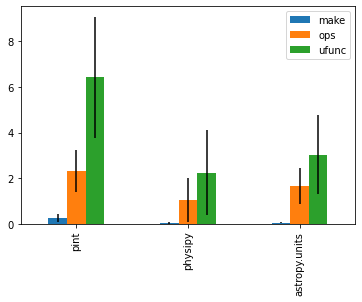

In [11]:
results['speed']['mean'].sort_index(ascending=False).plot(kind='bar', yerr=results['speed']['std'].sort_index(ascending=False))

<AxesSubplot:>

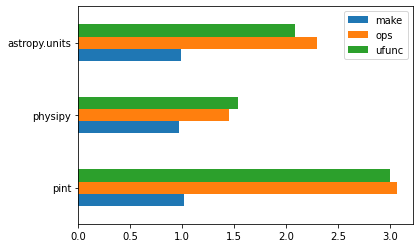

In [12]:
results['speed']['np_rel'].sort_index(ascending=False).plot(kind='barh')